In [263]:
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model, preprocessing
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set svg format
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [264]:
df = pd.read_csv('car.csv')

In [265]:
print(df.shape)
df.head()

(1728, 7)


,buying,maint,door,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [266]:
cols = list(df.columns)
le = preprocessing.LabelEncoder()
for i in cols:
    df.loc[:, i] = le.fit_transform(list(df.loc[:, i]))

In [267]:
df.head()

,buying,maint,door,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [268]:
df.describe()

,buying,maint,door,persons,lug_boot,safety,class
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,1.553241
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.875948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,1.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,2.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


<AxesSubplot:>

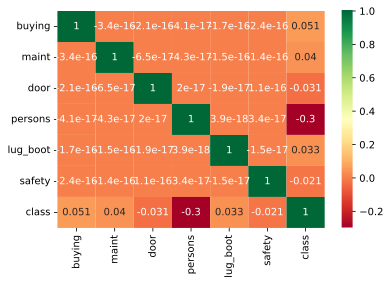

In [269]:
corr = df.corr()
sns.heatmap(data = corr, annot = True, cmap = 'RdYlGn')

In [270]:
target = 'class'
features = df.drop(labels = [target], axis = 1)
X = np.array(features)
y = np.array(df[target])

In [271]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

In [272]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
predict = model.predict(x_test)
print('Accuracy :', acc)
print('Mean squared error :', mean_squared_error(y_test, predict))

Accuracy : 0.9132947976878613
Mean squared error : 0.2658959537572254


In [273]:
p1 = max(max(y_test), max(predict))
p2 = min(min(y_test), min(predict))
x_c = np.arange(len(predict))

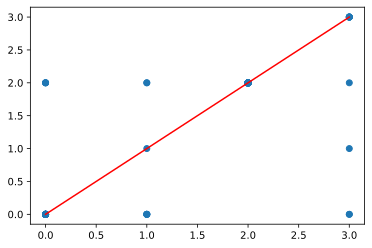

In [274]:
plt.scatter(y_test, predict)
plt.plot([p1, p2], [p1, p2], color = 'red')
plt.show()

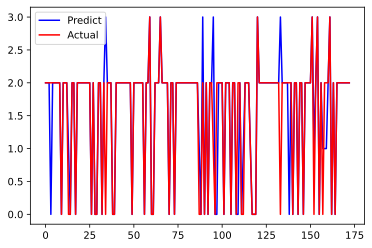

In [275]:
plt.plot(x_c, y_test, label = 'Predict', color = 'blue')
plt.plot(x_c, predict, label = 'Actual', color = 'red')
plt.legend()
plt.show()

In [276]:
p = pd.DataFrame(data = predict, columns = ['Predict'])
y_t = pd.DataFrame(data = y_test, columns = ['Actual'])
print(p.value_counts())
print(y_t.value_counts())

Predict
2          126
0           39
3            6
1            2
dtype: int64
Actual
2         119
0          36
3          10
1           8
dtype: int64
